# Assignment 1

#### Due Date: 24th Jan'18

In this assignment we will cover the basics of Machine Learning. We will cover the following topics:

1) Linear Regression

2) Logistic Regression

3) EM Algorithm

4) K-means/Hirarchical Clustering.

It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like scipy), which directly give functions for these algorithms, are to be used. 

## Linear Regression

Defination: Given a data set ${\displaystyle \{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}} $ of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y_i$ and the $p$-vector of regressors $x_i$ is linear. This relationship is modeled through a disturbance term or error variable $ε_i$ - an unobserved random variable that adds noise to the linear relationship between the dependent variable and regressors. Thus the model takes the form:

$$ {\displaystyle \mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,} $$

where,

$$ \mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad $$

$$ {\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\top }\\\mathbf {x} _{2}^{\top }\\\vdots \\\mathbf {x} _{n}^{\top }\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},}
$$

$$ {\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad {\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}.} 
$$


For this problem, in the class lecture we covered the Least Square Solution, which can be formulated as:

$${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\top }\mathbf {X} )^{-1}\mathbf {X} ^{\top }\mathbf {y} =\left(\sum \mathbf {x} _{i}\mathbf {x} _{i}^{\top }\right)^{-1}\left(\sum \mathbf {x} _{i}y_{i}\right).} $$

## Question 1

a) You will write the code to find the LSS for the given data. The data contains 3 columns, each for $y, X_{1}$, and $X_{2}$ respectively. Few of the possible models are:

$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{1} }}X_1+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$


$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$


$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{1} }}X_1+ {\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$

Given this data, find the coefficients for each of these models.

b) Now that you have three models, you must select the best one. Use Cross-validation with 5 folds on the dataset to find the optimal model (On the basis of RMSE on the test partition). 

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

def RMS(y_actual, y_predicted):
    diff = y_actual - y_predicted
    mse = np.square(diff).mean()
    rmse = np.sqrt(mse)
    return rmse

def R2(y,y_pred):
    diff = y_pred - y
    sse = np.sum(np.square(diff))
    sstol = np.sum(np.square((y - y.mean())))
    r2 = 1 - (sse/sstol)
    return r2

def cross_validate(idx, x, y, folds=5, repeats=5):
    
    ypred = np.zeros((len(y),repeats))
    score = np.zeros(repeats)
    opt_score = 1e7
    x = np.array(x)
    for r in range(repeats):
        i=0
        x,y = shuffle(x,y,random_state=r) #shuffle data before each repeat
        kf = KFold(n_splits=folds,random_state=i+100) #random split, different each time
        for train_ind,test_ind in kf.split(x):
            #print('Fold', i+1, 'out of',folds)
            xtrain,ytrain = x[train_ind,:],y[train_ind]
            xtest,ytest = x[test_ind,:],y[test_ind]
            beta = np.dot(inv(np.dot(xtrain.T,xtrain)), np.dot(xtrain.T,ytrain))
            ypred[test_ind,r] = np.dot(xtest,beta)
            #model.fit(xtrain, ytrain)
            #ypred[test_ind,r]=model.predict(xtest)
            i+=1
        score[r] = RMS(ypred[:,r],y)
        if score[r]<opt_score:
            opt_score = score[r]
            beta_opt = beta
            #print ('beta_opt',beta_opt)
    print('RMS:',str(np.mean(score)))
    return beta_opt
    pass

# Load the dataset 
train_data = np.load('utils/assign_1_data_1_train.npy')
# now write the code for finding the solution for each of the three models.

Y  = train_data[:, 0]

X = train_data[:,1:3]
X = np.c_[ np.ones(300), X ] 


X1 = train_data[:,1]
X1 = np.c_[ np.ones(300), X1 ] 

X2 = train_data[:, 2]
X2 = np.c_[ np.ones(300), X2 ] 

beta1 = np.dot(inv(np.dot(X1.T,X1)), np.dot(X1.T,Y))
beta2 = np.dot(inv(np.dot(X2.T,X2)), np.dot(X2.T,Y))
beta3 = np.dot(inv(np.dot(X.T,X)), np.dot(X.T,Y))

Y1_predict = np.dot(X1,beta1)
Y2_predict = np.dot(X2,beta2)
Y3_predict = np.dot(X,beta3)


In [2]:
# Finally, Write The estimates of the betas here:

# Model 1
print ('model_1:',beta1)
# Model 2
print ('model_2:',beta2)
# Model 3
print ('model_3:',beta3)

model_1: [  82.55935339 -208.39095947]
model_2: [-2694.47627382     4.85238331]
model_3: [-947.95740796 -206.47337776    3.04933431]


In [3]:
# partition the dataset into 5 random folds.
num_folds = 5
kf = KFold(n_splits=num_folds) # Define the split - into 5 folds 

# find mean accuracy over all rounds
# for each fold, approx. model from the remaining folds, and calculate RMSE on the test fold.
kf.get_n_splits(X1)
beta1 = cross_validate(1, X1, Y, folds=5, repeats=10)

kf.get_n_splits(X2)
beta2 = cross_validate(2, X2, Y, folds=5, repeats=10)

kf.get_n_splits(X)
beta3 = cross_validate(3, X, Y, folds=5, repeats=10) 

# find avg RMSE for each model. 

# Which is the best model?
print ("\nHence Model_3 : y=β1X1+β2X2+β0+ε is best!!")

RMS: 1425.5556433433846
RMS: 2249.0389669857364
RMS: 1414.9682995298292

Hence Model_3 : y=β1X1+β2X2+β0+ε is best!!


In [4]:
# Finally, Give the R^2 score of the best model in the test set:
test_data = np.load('utils/assign_1_data_1_test.npy')
#print (beta1,beta2,beta3)
X_test = test_data[:, 1:3]
Y_test = test_data[:,0]
X_test = np.c_[ np.ones(150), X_test] 
Y_predict = np.dot(X_test,beta3)
r2 = R2(Y_test,Y_predict)
print ('R2 Score:',r2)

R2 Score: 0.5992442502309905


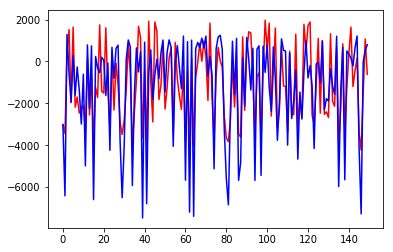

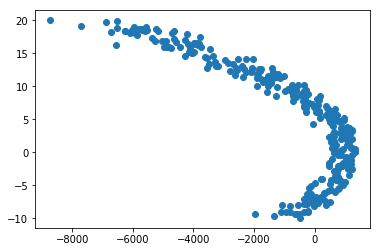

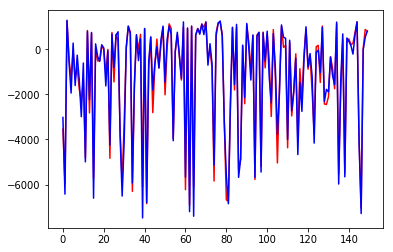

R2 Score: 0.9740038621066467


In [5]:
# Bonus

# Show a graph between the predicted Y^ and the Ground truth Y
t = np.arange(0., 150., 1)
plt.plot(t,Y_predict,'r',t, Y_test, 'b')
plt.show()

# Try to plot Y vs X_1 in train set
plt.scatter(Y, X1[:,1])
plt.show()
# can it help you improve your model?
# construct the better model.

X_new = np.c_[np.ones(300),train_data[:,1]**2, train_data[:,2]]
beta_new = np.dot(inv(np.dot(X_new.T,X_new)), np.dot(X_new.T,Y))

X_test = np.c_[np.ones(150),test_data[:,1]**2, test_data[:,2]]
Y_new_predict = np.dot(X_test,beta_new)

r2_new = R2(Y_test,Y_new_predict)

plt.plot(t,Y_new_predict,'r',t, Y_test, 'b')
plt.show()
print ('R2 Score:',r2_new)


# Logistic Regression

Generaly, Logistic Regression is used to predict categorial variables. For the simple problem of 2-way classification, the output $\hat{y_i}$ is modeled as the probability that $\{X_i\}$ belongs to class $1$ (given two classes $0$, and $1$).

$$ P( \{X_i\} \in Set_1 ) = \hat{y_i}, $$ ( $y_i$ is the actual label; $y_i \in \{ 0,1 \}$ )


$\hat{y_i}$ is typically modeled as the output of a sigmoid on a linear combination of the input feature $\{X_i\}$:

$$ \mathbf {\hat{y}} = \sigma(X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }}) = \sigma_\beta(X)$$

Now, The likelihood of some given data for this model can be written as:

$${\displaystyle {\begin{aligned}L(\beta |x)&=Pr(Y|X;\beta )\\&=\prod _{i}Pr(y_{i}|x_{i};\beta )\\&=\prod _{i}\sigma_{\beta }(x_{i})^{y_{i}}(1-\sigma_{\beta }(x_{i}))^{(1-y_{i})}\end{aligned}}}$$

Unlike in the case of Linear regression, this equation has no closed form solution. Hence we will use gradient descent on the negative log-likelihood $J(\beta)$ to find the optimal $\beta$

$$
J(\beta) = \sum_i{\big( y_ilog(\hat{y_i})+ (1-y_i)log(1-\hat{y_i}) \big) }
$$

with the update equation:

$$
\beta_j = \beta_j + \alpha \times \frac{ \partial J(\beta)}{\partial \beta}
$$

## Question 2

a) You will write the code to find the optimal logistic regression model for the given data. The data contains 3 columns, each for $y, X_{1}$, and $X_{2}$ respectively. For the rate of learning $\alpha$ use a linearly decaying policy, or step-wise reduction policy. 

$$ {\displaystyle \mathbf {y} =\sigma \big( {\boldsymbol {\beta_{1} }}X_1+ {\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }}} \big) $$

b) Explore possible methods of adjusting the learning rate $\alpha$ 

In [6]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, alpha, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Updating weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += alpha * gradient
        
        # Print log-likelihood 
        #if step % 1000 == 0:
         #   print ('iter no:',step,log_likelihood(features, target, weights))
        
    return weights

# Load the train dataset 
train_data = np.load('utils/assign_1_data_2_train.npy')

# now write the code to find the parameters of the optimization.
X_train = train_data[:210,1:3]
Y_train = train_data[:210,0]

X_val = train_data[210:,1:3]
X_val =  np.c_[np.ones(90), X_val] 
Y_val = train_data[210:,0]


#print (X_test.shape, Y_test.shape)
for i in range(20):
    weights = logistic_regression(X_train,Y_train,num_steps = i*1000, alpha = 5e-5, add_intercept=True)   
    scores = np.dot(X_val, weights)
    Y_preds = np.round(sigmoid(scores))
    print ('itera no:',i,'Accuracy: {0}'.format((Y_preds == Y_val).sum().astype(float) / len(Y_preds)))
print ('After t=11000, it starts overfitting')

itera no: 0 Accuracy: 0.37777777777777777
itera no: 1 Accuracy: 0.9222222222222223
itera no: 2 Accuracy: 0.9444444444444444
itera no: 3 Accuracy: 0.9444444444444444
itera no: 4 Accuracy: 0.9444444444444444
itera no: 5 Accuracy: 0.9444444444444444
itera no: 6 Accuracy: 0.9666666666666667
itera no: 7 Accuracy: 0.9666666666666667
itera no: 8 Accuracy: 0.9666666666666667
itera no: 9 Accuracy: 0.9777777777777777
itera no: 10 Accuracy: 0.9777777777777777
itera no: 11 Accuracy: 0.9777777777777777
itera no: 12 Accuracy: 0.9666666666666667
itera no: 13 Accuracy: 0.9555555555555556
itera no: 14 Accuracy: 0.9444444444444444
itera no: 15 Accuracy: 0.9444444444444444
itera no: 16 Accuracy: 0.9444444444444444
itera no: 17 Accuracy: 0.9444444444444444
itera no: 18 Accuracy: 0.9444444444444444
itera no: 19 Accuracy: 0.9444444444444444
After t=11000, it starts overfitting


In [7]:
# test on a validation part every 't' iterations to find when you start overfitting.

#weights = logistic_regression(X_train,Y_train,num_steps = 50000, learning_rate = 5e-5, add_intercept=True)

# Now for 't' iterations train on the entire dataset for testing on the test_data
weights = logistic_regression(train_data[:,1:3],train_data[:,0],num_steps = 11000, alpha = 5e-5, add_intercept=True)


In [8]:
# find the accuracy on the test set:
test_data = np.load('utils/assign_1_data_2_test.npy')
X_test = test_data[:,1:3]
X_test = np.c_[np.ones(150), X_test] 
Y_test = test_data[:,0]

scores = np.dot(X_test, weights)
Y_preds = np.round(sigmoid(scores))
print ('Accuracy: {0}'.format((Y_preds == Y_test).sum().astype(float) / len(Y_preds)))

Accuracy: 0.8933333333333333


In [9]:
# Bonus
# Can you adjust the learning rate alpha in a better way?


# EM algorithm

This is a general framework for likelihood-based parameter estimation.
A basic outline of this algorithm is:

* start with initial guesses of parameters

* E step: estimate memberships given params

* M step: estimate params given memberships

* Repeat until convergence

** Refer to [this link](http://www.rmki.kfki.hu/~banmi/elte/bishop_em.pdf) (9.2.2) .**


## Question 3

Let ${\displaystyle \mathbf {x} =(\mathbf {x} _{1},\mathbf {x} _{2},\ldots ,\mathbf {x} _{n})} $ be a sample of $n$ independent observations from a mixture of two multivariate normal distributions of dimension $d$ , and let ${\displaystyle \mathbf {z} =(z_{1},z_{2},\ldots ,z_{n})} $ be the latent variables that determine the component from which the observation originates.

$X_i |(Z_i = 1) \sim \mathcal{N}_d(\boldsymbol{\mu}_1,\Sigma_1)$ and $X_i |(Z_i = 2) \sim \mathcal{N}_d(\boldsymbol{\mu}_2,\Sigma_2)$

The aim is to estimate the unknown parameters representing the mixing value between the Gaussians and the means and covariances of each:

$$ \theta = \big( \boldsymbol{\tau},\boldsymbol{\mu}_1,\boldsymbol{\mu}_2,\Sigma_1,\Sigma_2 \big) $$

a) Given the data, find the parameters $\theta$ using EM algorithm.



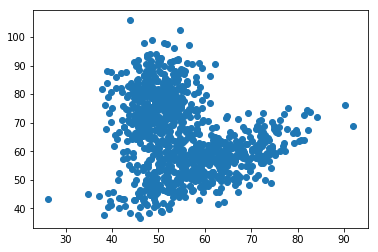

55.220520035551964 65.37673868198131


/home/giggz07/Desktop/ENV/lib/python3.5/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/giggz07/Desktop/ENV/lib/python3.5/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   lambda        mu1        mu2                    sig1  \
0   0.738  56.161968  52.568654    [9.2195271042246, 0]   
1   0.262  59.326511  82.418984  [0, 9.265348928295978]   

                     sig2  
0  [8.609142602378398, 0]  
1  [0, 6.213436207554705]  
iteration 1, shift 10.221257112610663
   lambda        mu1        mu2                    sig1  \
0   0.724  57.234463  49.937568  [9.728940967314045, 0]   
1   0.276  58.893747  82.382846  [0, 8.883460857135674]   

                     sig2  
0  [4.436547823777161, 0]  
1  [0, 5.767692296494605]  
iteration 2, shift 2.8742732497212105
   lambda        mu1        mu2                    sig1  \
0   0.703  57.509807  49.801771  [9.742786680101489, 0]   
1   0.297  58.475919  81.711003  [0, 8.675483918255791]   

                     sig2  
0  [4.289263940730956, 0]  
1   [0, 6.06821906347205]  
iteration 3, shift 0.8486516240363046
   lambda        mu1        mu2                    sig1  \
0   0.671  57.854834  49.847800  [9.81535

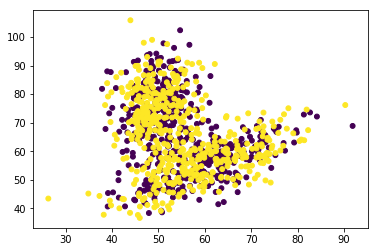

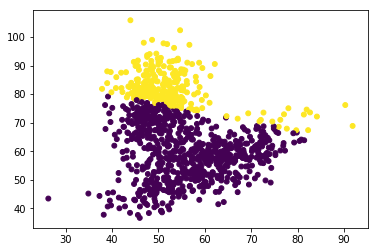

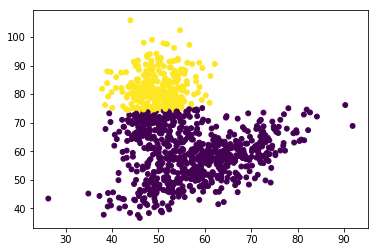

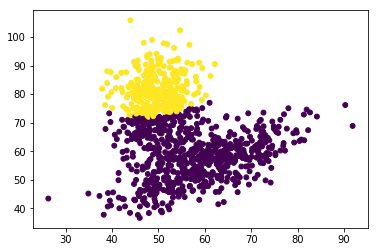

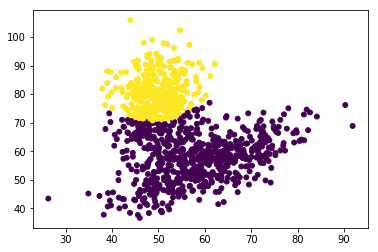

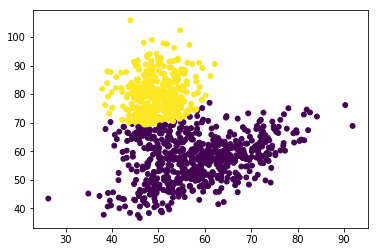

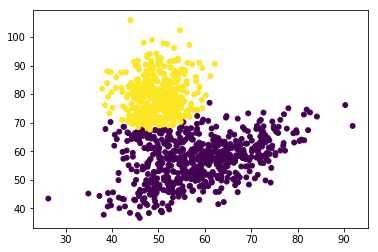

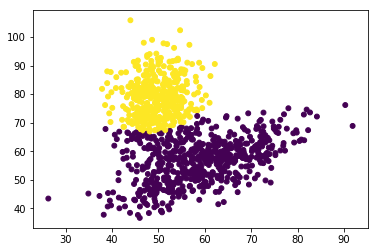

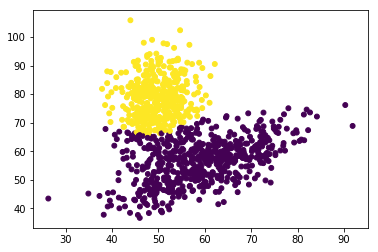

In [10]:
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the train dataset 
data = np.load('utils/assign_1_data_3.npy')
plt.scatter(data[:,0],data[:,1])
plt.show()
X = data[:,0]
Y = data[:,1]
#print (X)

# The data is a 1000*2 numpy array, where each row is a independent observation, and 
# the columns are measurement in dimension x and y respectively. 
# now write the code to find the parameter theta.

rand.seed(42)
x_mean = np.mean(X)
y_mean = np.mean(Y)

print (x_mean,y_mean)
labels = ([1] * 500) + ([2] * 500)
data = {'x': X, 'y': Y, 'label': labels}
df = pd.DataFrame(data=data)

fig = plt.figure()
plt.scatter(data['x'], data['y'], 24, c=data['label'])
fig.savefig("true-values.png")

# init_params
init_params = { 'mu1': [x_mean,y_mean],
          'sig1': [ [1, 0], [0, 1] ],
          'mu2': [1.1*x_mean,1.5*x_mean],
          'sig2': [ [1, 0], [0, 1] ],
          'lambda': [0.4, 0.6]
        }

def prob(val, mu, sig, lam):
    p = lam
    for i in range(len(val)):
        p *= norm.pdf(val[i], mu[i], sig[i][i])
    return p

# assign every data point to its most likely cluster
def expectation(df, params):
    for i in range(df.shape[0]):
        x = df['x'][i]
        y = df['y'][i]
        p_cluster1 = prob([x, y], list(params['mu1']), list(params['sig1']), params['lambda'][0] )
        p_cluster2 = prob([x, y], list(params['mu2']), list(params['sig2']), params['lambda'][1] )
        #print ('here', p_cluster1,p_cluster2)
        if p_cluster1 > p_cluster2:
            df['label'][i] = 1
        else:
            df['label'][i] = 2
    return df

# update estimates of tau, mu and sigma
def maximization(df, params):
    cluster1_points = df[df['label'] == 1]
    #print ('max_step:',cluster1_points)
    cluster2_points = df[df['label'] == 2]
    percent_cluster1 = len(cluster1_points) / float(len(df))
    percent_cluster2 = 1 - percent_cluster1
    params['lambda'] = [percent_cluster1, percent_cluster2 ]
    params['mu1'] = [cluster1_points['x'].mean(), cluster1_points['y'].mean()]
    #print (params['mu1'])
    params['mu2'] = [cluster2_points['x'].mean(),cluster2_points['y'].mean()]
    params['sig1'] = [ [cluster1_points['x'].std(), 0 ], [ 0, cluster1_points['y'].std() ] ]
    #print (params['sig1'])
    params['sig2'] = [ [cluster2_points['x'].std(), 0 ], [ 0,cluster2_points['y'].std() ] ]
    return params
    
    
def dist(old_params, new_params):
    dist = 0
    for param in ['mu1', 'mu2']:
        for i in range(len(old_params)):
            dist += (old_params[param][i] - new_params[param][i]) ** 2
            #print (old_params[param][i],new_params[param][i])
    return dist ** 0.5

# loop until  convergence
shift = 1e5
epsilon = .5
iters = 0
df_copy = df.copy()
# randomly assign points to their initial clusters
df_copy['label'] = map(lambda x: x+1, np.random.choice(2, len(df)))
params = pd.DataFrame(init_params)


while shift > epsilon:
    iters += 1
    # E-step  
    updated_labels = expectation(df_copy.copy(), params)
    # M-step
    updated_parameters = maximization(updated_labels, params.copy())
    print (updated_parameters)
    #print (params)
    shift = dist(params, updated_parameters)
    print("iteration {}, shift {}".format(iters, shift))
    # update labels and params
    df_copy = updated_labels
    params = updated_parameters

    fig = plt.figure()
    plt.scatter(df_copy['x'], df_copy['y'], 24, c=df_copy['label'])
    fig.savefig("iteration{}.png".format(iters))

In [11]:
# Parameters are given by:
print ('See Above Results for parameters')

See Above Results for parameters


In [12]:
# Visualize the entire data by plotting them as points in a 2-D canvas.  
# Show the estimated means and the standard deviations.


# Clustering

For clustering we covered two algorithms

1) K-means : An iterative method to get 'K' clusters, initializing them randomly

2) Hirarchical : An iterative method to get a dendogram of clustering with various numbers of cluster centers.

### K-means Clustering

We initialize $K$ cluster centers $\{ c_1,c_2 ,... c_k\}$for $K$-clusters randomly. All the data points are assigned a cluster index $D_i \in \{ 1,2,...,k\}$, based on the closest cluster center to each point.

Now, for each cluster, the cluster centers are re-evaluated as the mean of all the points in the center.

$$
c_i = mean(\{ X_j | D_j = i \})
$$
This process continues till convergence.


## Question 4

The dataset contains 1000  color images.Convert them to grayscale images. We need to cluster them into various $n$ clusters based on the similarity of their histograms. For each image, find the histogram with bin size 25 (last bin of 30;i.e.225-255;giving you 10 bins). Now treating each of these bins as seperate dimensions, find:

a) Cluster Centers for $n = 5$ clusters, with $L_2$ distance criteria for measuring distance between a pair of images.

b) **Bonus**: Use Earth Movers Distance in the above problem.

In [13]:
# For this problem we will be using the 1000 test images of CIFAR-10 dataset.
## Load the data from the following link
# https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [14]:
# Convert it to grayscale values
data1 = unpickle('data_batch_1')
X1 = data1[b'data'] #numpy 10000*3072
Y1 = data1[b'labels'] #list
print (X1.shape)

grey = np.zeros((10000,1024)) # init 2D numpy array

# conerting RGB to Gray Scale = (R+G+B)/3
for rownum in range(10000):
    for colnum in range(1024):
        grey[rownum][colnum] = (int(X1[rownum][colnum])+int(X1[rownum][colnum+1024])+int(X1[rownum][colnum+2048]))/3


FileNotFoundError: [Errno 2] No such file or directory: 'data_batch_1'

In [ ]:
# find the histograms and get a 10-dimensional representation of each images.
hist,bin_edges= np.histogram(grey[0,:], density=True)
X = np.array(hist) 
for i in range(1,1000):
    hist,bin_edges= np.histogram(grey[i,:], density=True)
    X = np.c_[X,np.array(hist)] 
X = X.T
print (X.shape)
#plt.hist(grey[0,:], bins=25)  # arguments are passed to np.histogram
#plt.title("Histogram with '10' bins")
#plt.show()

In [ ]:
# Use K-means to find  out the number of cluster centers.
def kMeans(X, K, maxIters = 10):

    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return np.array(centroids) , C

centroids, C = kMeans(X, K = 5)

In [ ]:
# Visualize cluster means to see what they look like.
for k in range(5) :
    plt.bar([i*25+(25/2) for i in range(10)],centroids[k,:],width = 20)
    plt.show()

# References

Useful references will be added shortly.

1) Linear Regression
  * [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

2) Logistic Regression
  * [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)
  * [Win Vector Blog](http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/)
  * [Renselaer Course Slides](http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect09.pdf)
  
3) EM
  * [Cambridge Tutorial](http://www.cs.huji.ac.il/~yweiss/emTutorial.pdf)
  * [Chapter 9 - Pattern Recognition and Machine Learning by Christopher M. Bishop](http://www.rmki.kfki.hu/~banmi/elte/bishop_em.pdf)
  * [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)
  
4) K-means
  * [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)